# Assignment 1

Machine Learning (BBWL), Michael Mommert, FS2023, University of St. Gallen

The **goal** of this assignment is to implement a $k$-Nearest Neighbor (kNN) classifier that performs classification on the accompanied dataset. The dataset is 5-dimensional and consists of numerical features, only. Each datapoint belongs to either of three classes. Train a kNN classifier in such a way as to maximize its performance and to generalize well.

The general **objectives** are:
* to implement the ML pipeline using *scikit-learn* as discussed in the lecture and the lab course, following best practices;
* to properly perform hyperparameter tuning from which clearly follows which value of $k$ has been chosen and why;
* to compare the performance of the best trained model on the training, validation and test datasets, preventing both overfitting and underfitting.

This assignment will be **graded** based on:
* whether these objectives have been achieved;
* whether the solution follows best practices;
* how well the approach is documented (e.g., using text cells, plots, etc.);
* how clean the code is;
* the performance of the trained model.

There are no restrictions on the resources that you can use -- collaborating on assignments is allowed -- but students are not allowed to submit identical code.

Please submit your runnable Notebook to [michael.mommert@unisg.ch](mailto:michael.mommert@unisg.ch) **before 26 March 2023, 23:59**. Please include your name in the Notebook filename.

-----

The following code cell will import the dataset used in this assignment. Please do not modify this code cell.

In [1]:
import numpy as np
from urllib.request import urlopen
from io import BytesIO

# load data as binary npy file
raw_data = np.load(BytesIO(urlopen("https://raw.githubusercontent.com/HSG-AIML-Teaching/MLBBWL-2023FS/main/assignment_1/data.npy").read()))

x = raw_data[:,:5]  # this is your input data
y = raw_data[:, 5]  # this is your target vector

x.shape, y.shape

((2000, 5), (2000,))

-----

Please add your code in the following ... Good Luck!

1. Setup Environment

In [2]:
# import sklearn data and data pre-processing libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split

# import sklearn scalers
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import Normalizer

# import matplotlib data visualization library
import matplotlib.pyplot as plt

# import seaborn data visualization library
import seaborn as sns
from seaborn import color_palette

# import pandas data manipulation library
import pandas as pd

In [3]:
# convert data to pandas dataframe
df = pd.DataFrame(x, columns=["feature1", "feature2", "feature3", "feature4", "feature5"])

# add target vector to dataframe
df["target"] = y

# show first 5 rows of dataframe
df.head()

,feature1,feature2,feature3,feature4,feature5,target
0,-2.109198,-1.443881,-0.100620,-90.916762,-0.893275,2.0
1,-4.469359,-0.237587,-0.116520,3.983598,0.121665,1.0
2,5.754084,-0.459973,0.079301,-87.950730,-0.062872,2.0
3,-2.314240,1.162550,-0.015752,91.994132,0.973047,1.0
4,5.211160,-0.431351,0.063959,-85.552838,0.038414,2.0


-----

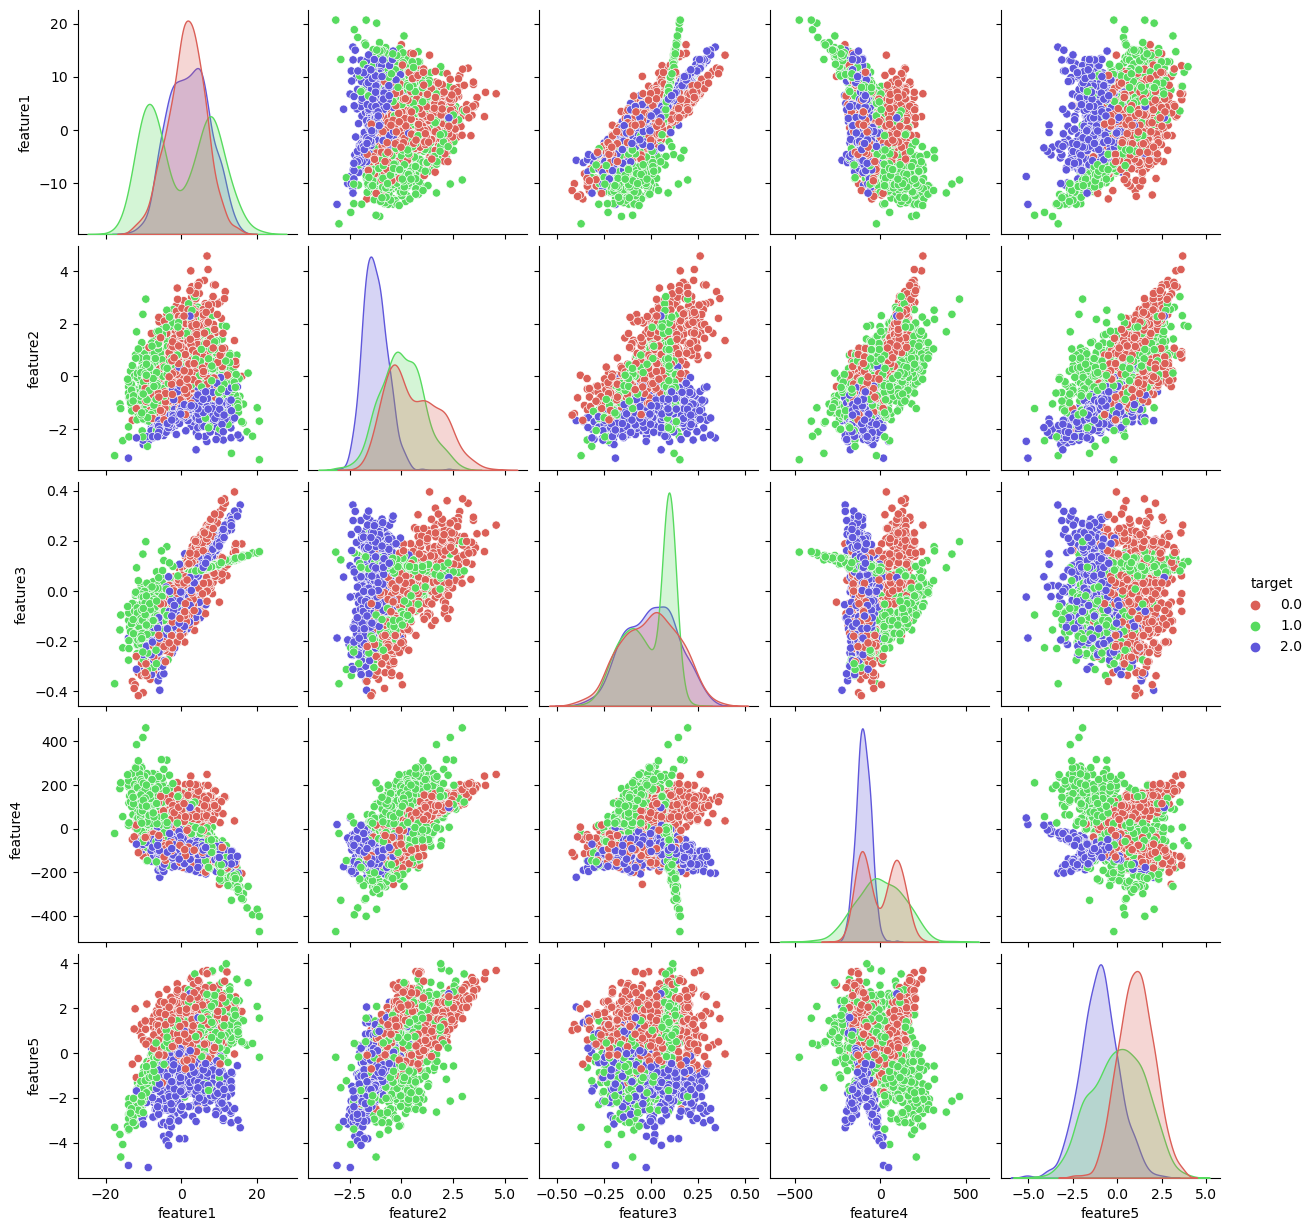

In [5]:
# plot the distribution of the features
plt.show(sns.pairplot(df, hue='target', palette=color_palette("hls", 3)))
plt.clf()

In [6]:
# scale the data using robust scaler
robust_scaler = RobustScaler()
robust_scaled_data = robust_scaler.fit_transform(x)

# scale the data using standard scaler
standard_scaler = StandardScaler()
standard_scaled_data = standard_scaler.fit_transform(x)

# scale the data using minmax scaler
minmax_scaler = MinMaxScaler()
minmax_scaled_data = minmax_scaler.fit_transform(x)

# scale the data using maxabs scaler
maxabs_scaler = MaxAbsScaler()
maxabs_scaled_data = maxabs_scaler.fit_transform(x)

# scale the data using normalizer
normalizer = Normalizer()
normalizer_scaled_data = normalizer.fit_transform(x)

In [14]:
# define random state
random_state = 42

# define test size
test_size = 0.3

# split the data into training and remainder set
x_train, x_remainder, y_train, y_remainder = train_test_split(minmax_scaled_data, y, test_size=test_size, random_state=random_state, stratify=y)

# split the remaindar data into validation and test set
x_val, x_test, y_val, y_test = train_test_split(x_remainder, y_remainder, test_size=0.5, random_state=random_state, stratify=y_remainder)

In [43]:
# don't show future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# define k (select random k for now)
k = 10

# import KNN classifier
from sklearn.neighbors import KNeighborsClassifier

# define KNN classifier
knn = KNeighborsClassifier(n_neighbors=k)

# fit the model
knn.fit(x_train, y_train)

# import accuracy score
from sklearn.metrics import accuracy_score

# predict the labels of the validation set
y_pred = knn.predict(x_val)

# compute the accuracy score
accuracy_score(y_val, y_pred)




0.8533333333333334

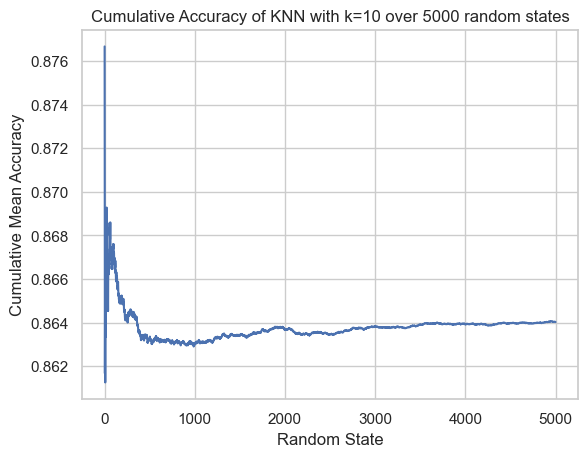

In [48]:
from sklearn.model_selection import cross_val_score

# define k value
k = 10

# define random states
random_states = range(1, 5001)

# define accuracies
accuracies = []

# loop over random states
for random_state in random_states:
    # split the data into training and remainder set
    x_train, x_remainder, y_train, y_remainder = train_test_split(robust_scaled_data, y, test_size=test_size, random_state=random_state, stratify=y)

    # split the remainder data into validation and test set
    x_val, x_test, y_val, y_test = train_test_split(x_remainder, y_remainder, test_size=0.5, random_state=random_state, stratify=y_remainder)

    # define KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # fit the model
    knn.fit(x_train, y_train)

    # predict the labels of the validation set
    y_pred = knn.predict(x_val)

    # compute the accuracy score
    accuracies.append(accuracy_score(y_val, y_pred))

# compute the cumulative average accuracies for each random state
cumulative_mean_accuracies = np.cumsum(accuracies) / np.arange(1, len(random_states)+1)

# plot the cumulative mean accuracies
plt.plot(random_states, cumulative_mean_accuracies)
plt.xlabel("Random State")
plt.ylabel("Cumulative Mean Accuracy")
plt.title("Cumulative Accuracy of KNN with k=10 over 5000 random states")
plt.show()

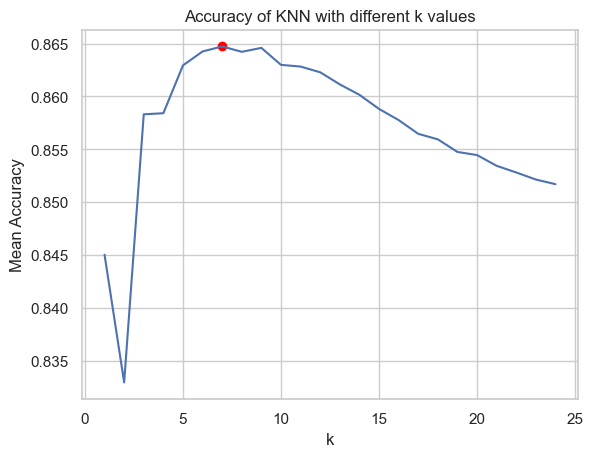

K with highest accuracy: 7. Accuracy: 0.8647247247247247


In [49]:
from operator import length_hint
from sklearn.model_selection import cross_val_score

# define k values
k_values = range(1, 25)

# define random states
random_states = range(1, 1000)

# define accuracies
accuracies = []

# loop over k values
for k in k_values:
    # loop over random states
    for random_state in random_states:
        # split the data into training and remainder set
        x_train, x_remainder, y_train, y_remainder = train_test_split(robust_scaled_data, y, test_size=test_size, random_state=random_state, stratify=y)

        # split the remainder data into validation and test set
        x_val, x_test, y_val, y_test = train_test_split(x_remainder, y_remainder, test_size=0.5, random_state=random_state, stratify=y_remainder)

        # define KNN classifier
        knn = KNeighborsClassifier(n_neighbors=k)

        # fit the model
        knn.fit(x_train, y_train)

        # predict the labels of the validation set
        y_pred = knn.predict(x_val)

        # compute the accuracy score
        accuracies.append(accuracy_score(y_val, y_pred))

# compute the average accuracies for each k value
mean_accuracies = np.array(accuracies).reshape(-1, len(random_states)).mean(axis=1)

# find the k value with the highest accuracy
best_k = k_values[np.argmax(mean_accuracies)]
best_accuracy = mean_accuracies.max()

# plot the mean accuracies and mark the maximum accuracy and k value
plt.plot(k_values, mean_accuracies)
plt.scatter(best_k, best_accuracy, color='red')
plt.xlabel("k")
plt.ylabel("Mean Accuracy")
plt.title("Accuracy of KNN with different k values")
plt.show()

# print the k value with the highest accuracy including the corresponding accuracy
best_index = np.argmax(mean_accuracies)
print("K with highest accuracy: {}. Accuracy: {}".format(best_k, best_accuracy))

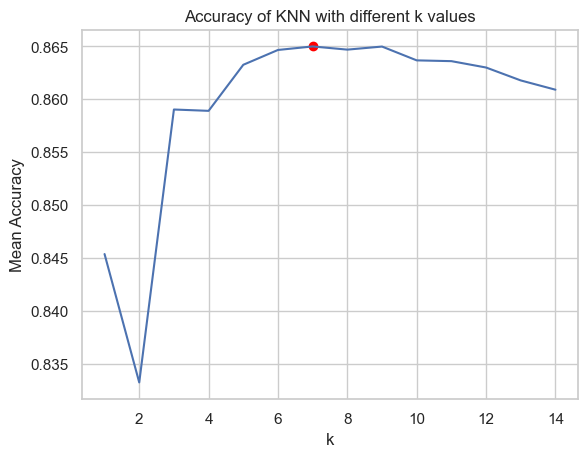

K with highest accuracy: 7. Accuracy: 0.8649858262464565


In [55]:
from joblib import Parallel, delayed
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# define k values
k_values = range(1, 15)

# define random states
random_states = range(1, 2000)

# define function to compute accuracy for a given k value and random state
def compute_accuracy(k, random_state):
    # split the data into training and remainder set
    x_train, x_remainder, y_train, y_remainder = train_test_split(robust_scaled_data, y, test_size=test_size, random_state=random_state, stratify=y)

    # split the remainder data into validation and test set
    x_val, x_test, y_val, y_test = train_test_split(x_remainder, y_remainder, test_size=0.5, random_state=random_state, stratify=y_remainder)

    # define KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # fit the model
    knn.fit(x_train, y_train)

    # predict the labels of the validation set
    y_pred = knn.predict(x_val)

    # compute the accuracy score
    return accuracy_score(y_val, y_pred)

# loop over k values in parallel
results = Parallel(n_jobs=-1)(delayed(compute_accuracy)(k=k, random_state=random_state) for k in k_values for random_state in random_states)

# compute the average accuracies for each k value
mean_accuracies = np.array(results).reshape(-1, len(random_states)).mean(axis=1)

# find the k value with the highest accuracy
best_k = k_values[np.argmax(mean_accuracies)]
best_accuracy = mean_accuracies.max()

# plot the mean accuracies and mark the maximum accuracy and k value
plt.plot(k_values, mean_accuracies)
plt.scatter(best_k, best_accuracy, color='red')
plt.xlabel("k")
plt.ylabel("Mean Accuracy")
plt.title("Accuracy of KNN with different k values")
plt.show()

# print the k value with the highest accuracy including the corresponding accuracy
best_index = np.argmax(mean_accuracies)
print("K with highest accuracy: {}. Accuracy: {}".format(best_k, best_accuracy))

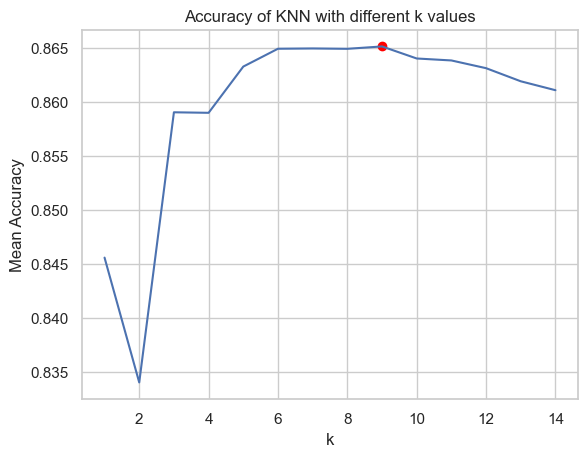

K with highest accuracy: 9. Accuracy: 0.8651042187760547


In [56]:
from joblib import Parallel, delayed
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# define k values
k_values = range(1, 15)

# define random states
random_states = range(1, 2000)

# define function to compute accuracy for a given k value and random state
def compute_accuracy(k, random_state):
    # split the data into training and remainder set
    x_train, x_remainder, y_train, y_remainder = train_test_split(standard_scaled_data, y, test_size=test_size, random_state=random_state, stratify=y)

    # split the remainder data into validation and test set
    x_val, x_test, y_val, y_test = train_test_split(x_remainder, y_remainder, test_size=0.5, random_state=random_state, stratify=y_remainder)

    # define KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # fit the model
    knn.fit(x_train, y_train)

    # predict the labels of the validation set
    y_pred = knn.predict(x_val)

    # compute the accuracy score
    return accuracy_score(y_val, y_pred)

# loop over k values in parallel
results = Parallel(n_jobs=-1)(delayed(compute_accuracy)(k=k, random_state=random_state) for k in k_values for random_state in random_states)

# compute the average accuracies for each k value
mean_accuracies = np.array(results).reshape(-1, len(random_states)).mean(axis=1)

# find the k value with the highest accuracy
best_k = k_values[np.argmax(mean_accuracies)]
best_accuracy = mean_accuracies.max()

# plot the mean accuracies and mark the maximum accuracy and k value
plt.plot(k_values, mean_accuracies)
plt.scatter(best_k, best_accuracy, color='red')
plt.xlabel("k")
plt.ylabel("Mean Accuracy")
plt.title("Accuracy of KNN with different k values")
plt.show()

# print the k value with the highest accuracy including the corresponding accuracy
best_index = np.argmax(mean_accuracies)
print("K with highest accuracy: {}. Accuracy: {}".format(best_k, best_accuracy))

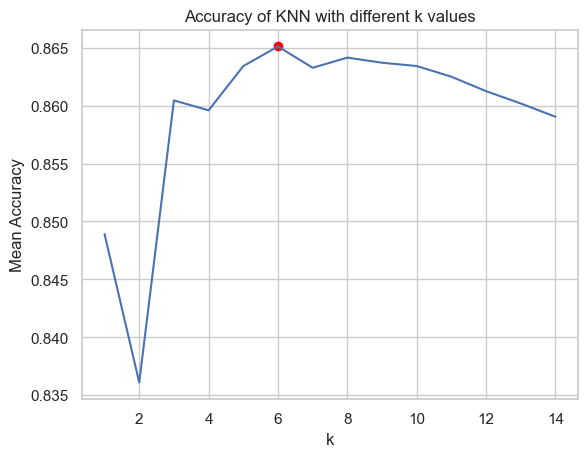

K with highest accuracy: 6. Accuracy: 0.865114223778556


In [57]:
from joblib import Parallel, delayed
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# define k values
k_values = range(1, 15)

# define random states
random_states = range(1, 2000)

# define function to compute accuracy for a given k value and random state
def compute_accuracy(k, random_state):
    # split the data into training and remainder set
    x_train, x_remainder, y_train, y_remainder = train_test_split(minmax_scaled_data, y, test_size=test_size, random_state=random_state, stratify=y)

    # split the remainder data into validation and test set
    x_val, x_test, y_val, y_test = train_test_split(x_remainder, y_remainder, test_size=0.5, random_state=random_state, stratify=y_remainder)

    # define KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # fit the model
    knn.fit(x_train, y_train)

    # predict the labels of the validation set
    y_pred = knn.predict(x_val)

    # compute the accuracy score
    return accuracy_score(y_val, y_pred)

# loop over k values in parallel
results = Parallel(n_jobs=-1)(delayed(compute_accuracy)(k=k, random_state=random_state) for k in k_values for random_state in random_states)

# compute the average accuracies for each k value
mean_accuracies = np.array(results).reshape(-1, len(random_states)).mean(axis=1)

# find the k value with the highest accuracy
best_k = k_values[np.argmax(mean_accuracies)]
best_accuracy = mean_accuracies.max()

# plot the mean accuracies and mark the maximum accuracy and k value
plt.plot(k_values, mean_accuracies)
plt.scatter(best_k, best_accuracy, color='red')
plt.xlabel("k")
plt.ylabel("Mean Accuracy")
plt.title("Accuracy of KNN with different k values")
plt.show()

# print the k value with the highest accuracy including the corresponding accuracy
best_index = np.argmax(mean_accuracies)
print("K with highest accuracy: {}. Accuracy: {}".format(best_k, best_accuracy))

In [58]:
# import classification report
from sklearn.metrics import classification_report

# compute the classification report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.79      0.80        99
         1.0       0.83      0.82      0.83       101
         2.0       0.84      0.88      0.86       100

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



In [32]:
# test the model on the test set with the minmax scaled data and the best k value found in the previous step
knn = KNeighborsClassifier(n_neighbors=6, metric="manhattan")
knn.fit(minmax_scaled_data, y)
y_pred = knn.predict(minmax_scaled_data)

# compute the accuracy score
accuracy_score(y, y_pred)

# print the accuracy score
print("Accuracy: {}".format(accuracy_score(y, y_pred)))

Accuracy: 0.907


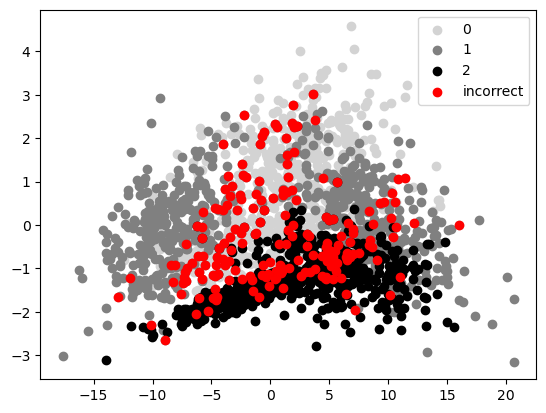

In [33]:
# plot the correct and incorrect predictions as scatter plots in different colors according to the true label
plt.scatter(x[y == 0, 0], x[y == 0, 1], color='lightgray', label='0')
plt.scatter(x[y == 1, 0], x[y == 1, 1], color='gray', label='1')
plt.scatter(x[y == 2, 0], x[y == 2, 1], color='black', label='2')
plt.scatter(x[y != y_pred, 0], x[y != y_pred, 1], color='red', label='incorrect')
plt.legend()
plt.show()

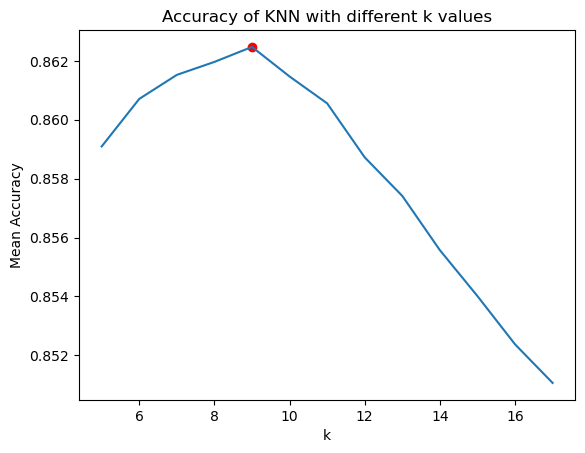

K with highest accuracy: 9. Accuracy: 0.8624729031182259


In [20]:
from joblib import Parallel, delayed
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# define k values
k_values = range(5, 18)

# define random states
random_states = range(1, 2000)

# define function to compute accuracy for a given k value and random state
def compute_accuracy(k, random_state):
    # split the data into training and remainder set
    x_train, x_remainder, y_train, y_remainder = train_test_split(minmax_scaled_data, y, test_size=test_size, random_state=random_state, stratify=y)

    # split the remainder data into validation and test set
    x_val, x_test, y_val, y_test = train_test_split(x_remainder, y_remainder, test_size=0.5, random_state=random_state, stratify=y_remainder)

    # define KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k, metric="chebyshev")

    # fit the model
    knn.fit(x_train, y_train)

    # predict the labels of the validation set
    y_pred = knn.predict(x_val)

    # compute the accuracy score
    return accuracy_score(y_val, y_pred)

# loop over k values in parallel
results = Parallel(n_jobs=-1)(delayed(compute_accuracy)(k=k, random_state=random_state) for k in k_values for random_state in random_states)

# compute the average accuracies for each k value
mean_accuracies = np.array(results).reshape(-1, len(random_states)).mean(axis=1)

# find the k value with the highest accuracy
best_k = k_values[np.argmax(mean_accuracies)]
best_accuracy = mean_accuracies.max()

# plot the mean accuracies and mark the maximum accuracy and k value
plt.plot(k_values, mean_accuracies)
plt.scatter(best_k, best_accuracy, color='red')
plt.xlabel("k")
plt.ylabel("Mean Accuracy")
plt.title("Accuracy of KNN with different k values")
plt.show()

# print the k value with the highest accuracy including the corresponding accuracy
best_index = np.argmax(mean_accuracies)
print("K with highest accuracy: {}. Accuracy: {}".format(best_k, best_accuracy))